In [0]:
import os
from Audio_reader import readtf
from getman import getmanlist
import gc
import numpy as np
import pandas as pd
import pickle
from keras.layers import Dense, Input, Dropout,Flatten,MaxPooling1D,SpatialDropout2D
from keras.layers import Conv1D, MaxPooling2D,BatchNormalization,Conv2D
from keras.models import Model
from keras.models import Sequential
from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers

In [0]:
def check(y):
    if 74 in y:
        return 0 
    #male
    if 1 in y:
        return 1
    #female
    if 2 in y:
        return 2
    #child
    if 3 in y:
        return 3
    return 0

In [0]:
X = []
Y = [] 
with open("X_list_eval.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list_eval.pickle","rb") as xf:
    Y.extend(pickle.load(xf))
      
with open("X_list.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list.pickle","rb") as xf:
    Y.extend(pickle.load(xf))

X=np.array(X)
Y=np.array(Y)  

X = X.astype('float32')    
X /= 128



In [0]:
learning_rate=0.001
#decay=0.000001
momentum=0.99
dropout_rate = 0.35

rglrzr = regularizers.l2(0.0015)

In [203]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(rate=dropout_rate))

model.add(Conv2D(128, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(SpatialDropout2D(rate=dropout_rate))



model.add(Conv2D(256, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(rate=dropout_rate))


model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(SpatialDropout2D(rate=dropout_rate))



model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(SpatialDropout2D(rate=dropout_rate))




model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

optimizer = optimizers.SGD(lr=learning_rate,momentum=momentum)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_353 (Conv2D)          (None, 10, 128, 64)       640       
_________________________________________________________________
batch_normalization_351 (Bat (None, 10, 128, 64)       256       
_________________________________________________________________
max_pooling2d_194 (MaxPoolin (None, 5, 64, 64)         0         
_________________________________________________________________
spatial_dropout2d_36 (Spatia (None, 5, 64, 64)         0         
_________________________________________________________________
conv2d_354 (Conv2D)          (None, 5, 64, 128)        73856     
_________________________________________________________________
batch_normalization_352 (Bat (None, 5, 64, 128)        512       
_________________________________________________________________
max_pooling2d_195 (MaxPoolin (None, 5, 32, 128)        0         
__________

In [0]:
cb=[]

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.85, patience=3, verbose=0, mode='auto')
early_stopping = EarlyStopping(monitor='acc', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

cb.append(reduce_lr)
cb.append(early_stopping)

In [205]:
history=model.fit(X, Y,
          batch_size=32,
          epochs=200,
          verbose=2,
          callbacks=cb,
          validation_split=0.2,
          shuffle=True)

Train on 506 samples, validate on 127 samples
Epoch 1/200
 - 21s - loss: 1.6412 - acc: 0.4387 - val_loss: 1.5256 - val_acc: 0.2677
Epoch 2/200
 - 1s - loss: 1.1719 - acc: 0.5079 - val_loss: 3.3752 - val_acc: 0.2362
Epoch 3/200
 - 1s - loss: 1.0400 - acc: 0.5692 - val_loss: 9.0438 - val_acc: 0.2362
Epoch 4/200
 - 1s - loss: 0.9893 - acc: 0.5474 - val_loss: 6.0266 - val_acc: 0.2362
Epoch 5/200
 - 1s - loss: 0.9436 - acc: 0.5949 - val_loss: 7.7418 - val_acc: 0.5197
Epoch 6/200
 - 1s - loss: 0.8892 - acc: 0.6107 - val_loss: 2.6189 - val_acc: 0.4646
Epoch 7/200
 - 1s - loss: 0.8873 - acc: 0.6107 - val_loss: 4.7984 - val_acc: 0.5197
Epoch 8/200
 - 1s - loss: 0.8690 - acc: 0.6028 - val_loss: 4.4517 - val_acc: 0.2362
Epoch 9/200
 - 1s - loss: 0.9014 - acc: 0.5751 - val_loss: 2.2771 - val_acc: 0.2362
Epoch 10/200
 - 1s - loss: 0.8982 - acc: 0.5949 - val_loss: 1.5919 - val_acc: 0.5197
Epoch 11/200
 - 1s - loss: 0.8625 - acc: 0.6285 - val_loss: 1.0814 - val_acc: 0.5197
Epoch 12/200
 - 1s - loss: 

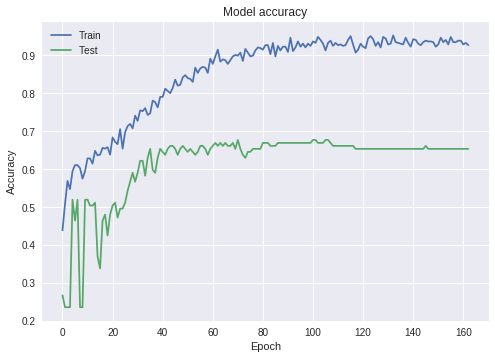

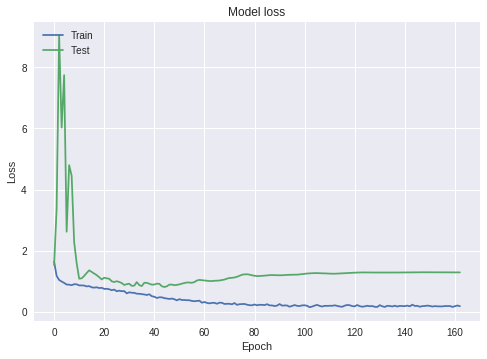

In [206]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.save('VGG-ish_73.model')